# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [56]:
# %pip install --upgrade plotly


## Import Statements

In [57]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots

# This might be helpful:
from collections import Counter


## Notebook Presentation

In [58]:
pd.options.display.float_format = '{:,.2f}'.format


## Load the Data

In [59]:
df_hh_income = pd.read_csv(
    'Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv(
    'Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv(
    'Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv(
    'Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")


# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [60]:
print("--- df_hh_income ---")
print(f"shape: {df_hh_income.shape}")
print(f"columns: {df_hh_income.columns}")
print(f"--- NaN Analysis ---")
print(f"{df_hh_income.isna().any()}")
print(f"--- Duplicates Analysis---")
print(f"{df_hh_income.duplicated().any()}")


--- df_hh_income ---
shape: (29322, 3)
columns: Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
--- NaN Analysis ---
Geographic Area    False
City               False
Median Income       True
dtype: bool
--- Duplicates Analysis---
False


In [61]:
print("--- df_pct_poverty ---")
print(f"shape: {df_pct_poverty.shape}")
print(f"columns: {df_pct_poverty.columns}")
print(f"--- NaN Analysis ---")
print(f"{df_pct_poverty.isna().any()}")
print(f"--- Duplicates Analysis---")
print(f"{df_pct_poverty.duplicated().any()}")


--- df_pct_poverty ---
shape: (29329, 3)
columns: Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
--- NaN Analysis ---
Geographic Area    False
City               False
poverty_rate       False
dtype: bool
--- Duplicates Analysis---
False


In [62]:
print("--- df_pct_completed_hs ---")
print(f"shape: {df_pct_completed_hs.shape}")
print(f"columns: {df_pct_completed_hs.columns}")
print(f"--- NaN Analysis ---")
print(f"{df_pct_completed_hs.isna().any()}")
print(f"--- Duplicates Analysis---")
print(f"{df_pct_completed_hs.duplicated().any()}")


--- df_pct_completed_hs ---
shape: (29329, 3)
columns: Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
--- NaN Analysis ---
Geographic Area         False
City                    False
percent_completed_hs    False
dtype: bool
--- Duplicates Analysis---
False


In [63]:
print("--- df_share_race_city ---")
print(f"shape: {df_share_race_city.shape}")
print(f"columns: {df_share_race_city.columns}")
print(f"--- NaN Analysis ---")
print(f"{df_share_race_city.isna().any()}")
print(f"--- Duplicates Analysis---")
print(f"{df_share_race_city.duplicated().any()}")


--- df_share_race_city ---
shape: (29268, 7)
columns: Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
--- NaN Analysis ---
Geographic area          False
City                     False
share_white              False
share_black              False
share_native_american    False
share_asian              False
share_hispanic           False
dtype: bool
--- Duplicates Analysis---
False


In [64]:
print("--- df_fatalities ---")
print(f"shape: {df_fatalities.shape}")
print(f"columns: {df_fatalities.columns}")
print(f"--- NaN Analysis ---")
print(f"{df_fatalities.isna().any()}")
print(f"--- Duplicates Analysis---")
print(f"{df_fatalities.duplicated().any()}")


--- df_fatalities ---
shape: (2535, 14)
columns: Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')
--- NaN Analysis ---
id                         False
name                       False
date                       False
manner_of_death            False
armed                       True
age                         True
gender                     False
race                        True
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                        True
body_camera                False
dtype: bool
--- Duplicates Analysis---
False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [65]:
df_hh_income.fillna(0, inplace=True)
df_fatalities.dropna(inplace=True)


In [66]:
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].apply(
    lambda x: str(x).replace('-', '0')).astype('float64')
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].apply(
    lambda x: str(x).replace('-', '0')).astype('float64')


In [67]:
df_share_race_city = df_share_race_city.applymap(
    lambda x: str(x).replace('(X)', '0'))
df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] = df_share_race_city[[
    'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].astype('float64')


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [68]:
# Get average poverty rate by state
df_pct_poverty_state = df_pct_poverty.groupby(
    'Geographic Area', as_index=False).aggregate({'poverty_rate': pd.Series.mean})
df_pct_poverty_state.sort_values(
    by='Geographic Area', inplace=True)


In [69]:
fig = px.bar(df_pct_poverty_state,
             x='Geographic Area',
             y='poverty_rate',
             title='Poverty Rate by US State',
             labels={
                 'Geographic Area': 'State',
                 'poverty_rate': 'Poverty Rate'
             }
             )
fig.show()


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [70]:
# Get average high school graduation rate by state
df_pct_completed_hs_state = df_pct_completed_hs.groupby(
    'Geographic Area', as_index=False).aggregate({'percent_completed_hs': pd.Series.mean})
df_pct_completed_hs_state.sort_values(
    by='Geographic Area', inplace=True)


In [71]:
fig = px.bar(df_pct_completed_hs_state,
             x='Geographic Area',
             y='percent_completed_hs',
             title='High School Graduation Rate by US State',
             labels={
                 'Geographic Area': 'State',
                 'percent_completed_hs': 'High School Graduation Rate'
             }
             )
fig.show()


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [72]:
df_poverty_vs_hs = pd.merge(df_pct_completed_hs_state,df_pct_poverty_state, on='Geographic Area')

In [73]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=df_poverty_vs_hs['Geographic Area'], y=df_poverty_vs_hs['percent_completed_hs'], name="High School Graduation Rate"),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=df_poverty_vs_hs['Geographic Area'], y=df_poverty_vs_hs['poverty_rate'], name="Poverty Rate"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Poverty Rate and High School Graduation Rate"
)

# Set x-axis title
fig.update_xaxes(title_text="State")

# Set y-axes titles
fig.update_yaxes(title_text="High School Graduation Rate", secondary_y=False)
fig.update_yaxes(title_text="Poverty Rate", secondary_y=True)

fig.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [74]:
df_poverty_vs_hs.head()

,Geographic Area,percent_completed_hs,poverty_rate
0,AK,80.10,18.68
1,AL,80.16,20.61
2,AR,79.95,22.96
3,AZ,79.22,25.27
4,CA,80.82,16.89


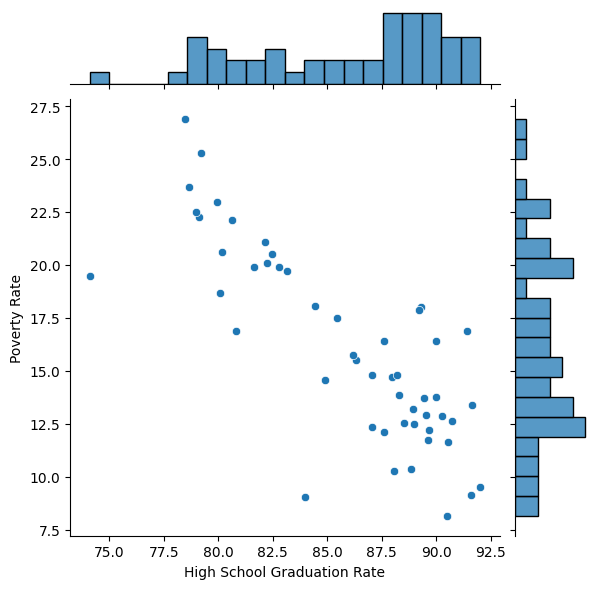

In [75]:
sns.jointplot(data=df_poverty_vs_hs, x="percent_completed_hs",
              y="poverty_rate", marginal_kws=dict(bins=20))
plt.xlabel("High School Graduation Rate")
plt.ylabel("Poverty Rate")
plt.show()


#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

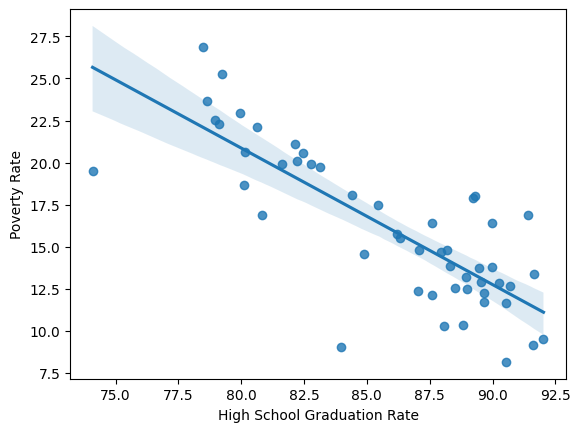

In [76]:
sns.regplot(data=df_poverty_vs_hs, x="percent_completed_hs",
              y="poverty_rate")
plt.xlabel("High School Graduation Rate")
plt.ylabel("Poverty Rate")
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [77]:
df_share_race_city_state = df_share_race_city.groupby('Geographic area', as_index=False).mean()
df_share_race_city_state.head()

,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,45.26,0.56,45.48,1.38,2.13
1,AL,72.51,23.32,0.66,0.48,2.98
2,AR,78.45,16.30,0.76,0.48,4.27
3,AZ,59.93,0.95,28.59,0.73,20.14
4,CA,71.54,2.68,1.72,5.54,29.51


In [78]:
# Normalization Functions
def normalize(x, total):
    return 0 if total == 0 else x/total * 100


def update_columns(df, col, total_col):
    df[col] = df[[col, total_col]].apply(lambda x: normalize(*x), axis=1)


In [79]:
temp_cols = df_share_race_city_state.columns.array.tolist()
temp_cols.remove('Geographic area')

# Calculate total column
df_share_race_city_state['share_total'] = df_share_race_city_state['share_white'] + df_share_race_city_state['share_black'] + \
    df_share_race_city_state['share_native_american'] + \
    df_share_race_city_state['share_asian'] + \
    df_share_race_city_state['share_hispanic']

# Update columns with normalized values
for col in temp_cols:
    update_columns(df_share_race_city_state, col, 'share_total')

In [80]:
fig = px.bar(df_share_race_city_state,
             x="Geographic area",
             y=['share_white', 'share_black', 'share_native_american',
                 'share_asian', 'share_hispanic'],
             title="Racial Makeup of Each US State",
             labels={
                 'value': 'Percentage',
                 'Geographic area': 'State'
             })
fig.show()


# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [81]:
df_by_race = df_fatalities['race'].value_counts()
df_by_race.rename(index={'W': 'White', 'B': 'Black', 'H': 'Hispanic',
                  'A': 'Asian', 'N': 'Native American', 'O': 'Others'}, inplace=True)


In [82]:
fig = px.pie(df_by_race, values=df_by_race, names=df_by_race.index.array, title='Peple Killed by Race', hole=.4)
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [83]:
df_by_gender = df_fatalities['gender'].value_counts()
df_by_gender.rename(index={'M': 'Male', 'F': 'Female'}, inplace=True)

In [84]:
fig = px.pie(df_by_gender, values=df_by_gender, names=df_by_gender.index.array, title='Peple Killed by Gender', hole=.4)
fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [85]:
df_gender_manner = df_fatalities.groupby(['gender', 'manner_of_death'], as_index=False).count()[['gender','manner_of_death','id']]
df_gender_manner.rename(columns={'id':'count'}, inplace=True)

In [86]:
df_gender_manner_m = df_gender_manner[df_gender_manner['gender'] == 'M']
df_gender_manner_f = df_gender_manner[df_gender_manner['gender'] == 'F']

In [87]:
fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type': 'domain'}, {'type': 'domain'}]],
                    subplot_titles=('Male', 'Female'))

fig.add_trace(
    go.Pie(labels=df_gender_manner_m['manner_of_death'],
           values=df_gender_manner_m['count']),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=df_gender_manner_f['manner_of_death'],
           values=df_gender_manner_f['count']),
    row=1, col=2
)

fig.update_layout(height=500, width=900,
                  title_text="Manner of Death by Gender")
fig.show()


# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [88]:
df_armed = df_fatalities['armed'].value_counts()
df_armed.head()

gun           1247
knife          324
unarmed        165
vehicle        158
toy weapon     102
Name: armed, dtype: int64

In [89]:
df_armed_weapon = df_armed[df_armed.index != 'unarmed']
fig = px.bar(
    df_armed_weapon,
    x=df_armed_weapon.index.array,
    y=df_armed_weapon,
    title='Weapon',
    labels={'x': 'Weapon Type', 'y': 'Count'}
)
fig.show()


In [90]:
armed_vs_unarmed = [df_armed_weapon.sum(), df_armed[df_armed.index == 'unarmed'].sum()]
fig = px.pie(armed_vs_unarmed, values=armed_vs_unarmed, names=['armed','unarmed'], title='Armed vs Unarmed', hole=.4)
fig.show()


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [91]:
age_25 = [df_fatalities['age'][df_fatalities['age'] > 25].count(), df_fatalities['age'][df_fatalities['age'] <= 25].count()]
fig = px.pie(age_25, values=age_25, names=['>25','<=25'], title='Percentage of people under and over 25 years old', hole=.4)
fig.show()

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

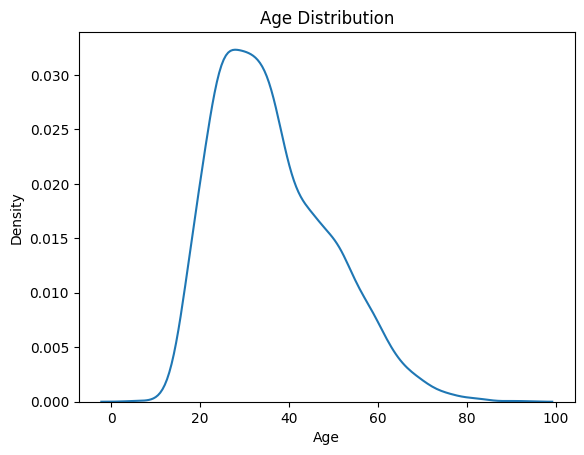

In [92]:
sns.kdeplot(data=df_fatalities, x="age")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

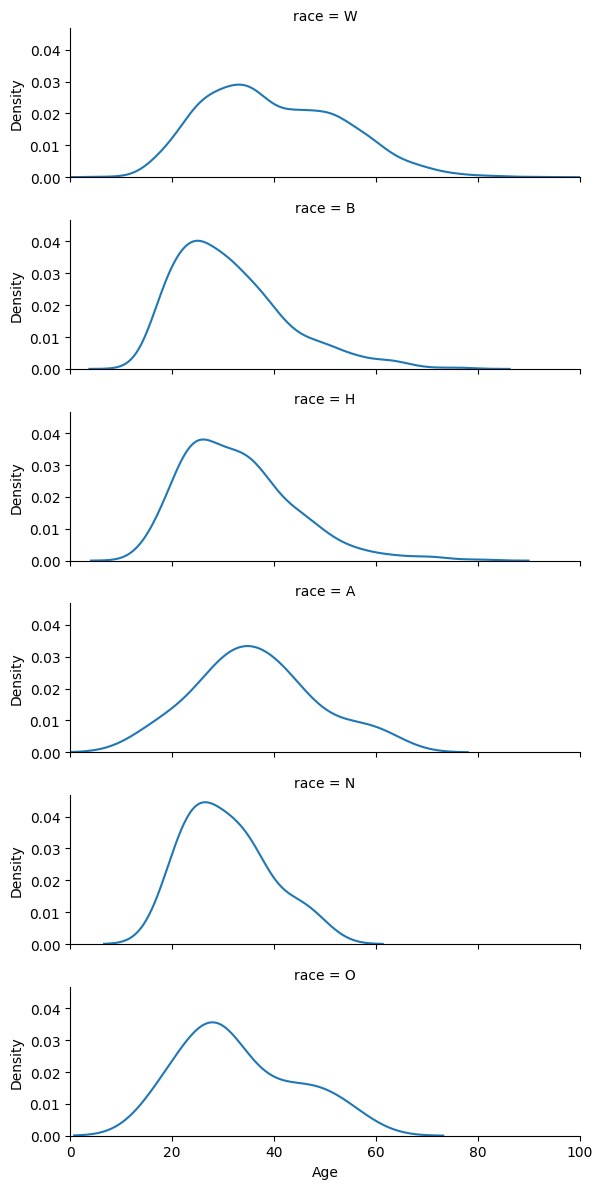

In [93]:
races = df_fatalities.race.value_counts().index
figs = sns.FacetGrid(df_fatalities, row="race", row_order=races,
                     height=2, aspect=3)
figs.map(sns.kdeplot, "age")
plt.xlabel("Age")
plt.xlim(0,100)
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [94]:
df_mental = df_fatalities['signs_of_mental_illness'].value_counts()
fig = px.pie(df_mental,values=df_mental, names=df_mental.index.array, hole=.4, title='Mental Illness Percentage')
fig.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [95]:
df_top_10_cities = df_fatalities.groupby(['city', 'state']).count().sort_values(by='id', ascending=False).head(10)['id']
df_top_10_cities = df_top_10_cities.reset_index()
df_top_10_cities.rename(columns={'id': 'killings'}, inplace=True)
df_top_10_cities['ctiy and state'] = df_top_10_cities['city'] + ', '+ df_top_10_cities['state']
df_top_10_cities


,city,state,killings,ctiy and state
0,Los Angeles,CA,35,"Los Angeles, CA"
1,Phoenix,AZ,28,"Phoenix, AZ"
2,Houston,TX,23,"Houston, TX"
3,Chicago,IL,22,"Chicago, IL"
4,Las Vegas,NV,17,"Las Vegas, NV"
5,Austin,TX,16,"Austin, TX"
6,San Antonio,TX,15,"San Antonio, TX"
7,Columbus,OH,14,"Columbus, OH"
8,Indianapolis,IN,14,"Indianapolis, IN"
9,St. Louis,MO,14,"St. Louis, MO"


In [96]:
fig = px.bar(df_top_10_cities, x='killings',
             y='ctiy and state',
             orientation='h',
             title='Top 10 Cities of Most Police Killings',
             color='killings',
             color_continuous_scale='Portland')
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()


# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [97]:
def get_city(input_state):
    # Get top 10 city in the corresponding state and rename to compare with df_share_race_city
    city_list = df_top_10_cities[df_top_10_cities['state'] == input_state]['city'] + " city"
    return df_share_race_city[(df_share_race_city['Geographic area'] == input_state) & (df_share_race_city['City'].isin(city_list))]

# Concat dataframes for the corresponding cities
df_share_race_top_10_city = pd.DataFrame(columns=df_share_race_city.columns)
for state in df_top_10_cities['state'].drop_duplicates().array:
    df_share_race_top_10_city = pd.concat([df_share_race_top_10_city, get_city(state)])
df_share_race_top_10_city['City'] = df_share_race_top_10_city['City'].str[:-5]
df_share_race_top_10_city.sort_values(by='City', inplace=True)
df_share_race_top_10_city.rename(columns={'Geographic area': 'State', 'share_asian': 'Asian', 'share_black': 'Black',
                                  'share_hispanic': 'Hispanic', 'share_native_american': 'Native American', 'share_white': 'White'}, inplace=True)


In [98]:
temp_cols = df_share_race_top_10_city.columns.array.tolist()
temp_cols.remove('State')
temp_cols.remove('City')

# Calculate total column
df_share_race_top_10_city['Total_Makeup'] = df_share_race_top_10_city['Asian'] + df_share_race_top_10_city['Black'] + \
    df_share_race_top_10_city['Hispanic'] + \
    df_share_race_top_10_city['Native American'] + \
    df_share_race_top_10_city['White']


# Update columns with normalized values
for col in temp_cols:
    update_columns(df_share_race_top_10_city, col, 'Total_Makeup')

In [99]:
df_share_race_top_10_city

,State,City,White,Black,Native American,Asian,Hispanic,Total_Makeup
24543,TX,Austin,57.54,6.82,0.76,5.31,29.57,118.70
6278,IL,Chicago,39.89,29.17,0.44,4.88,25.62,112.80
19379,OH,Columbus,61.81,28.14,0.30,4.12,5.63,99.50
25157,TX,Houston,40.50,19.01,0.56,4.81,35.12,124.70
7692,IN,Indianapolis,61.33,27.00,0.30,2.08,9.30,101.10
15666,NV,Las Vegas,55.70,9.96,0.63,5.47,28.25,111.50
2714,CA,Los Angeles,41.53,8.01,0.58,9.42,40.45,119.90
1201,AZ,Phoenix,55.56,5.48,1.85,2.70,34.40,118.60
25872,TX,San Antonio,49.73,4.73,0.62,1.64,43.29,146.00
14472,MO,St. Louis,43.99,49.30,0.30,2.91,3.51,99.80


In [100]:
# Filter df_fatalities for top 10 cities
df_fatalities_top_10 = df_fatalities[df_fatalities['city'].isin(df_top_10_cities['city'])]
df_fatalities_top_10_flat = df_fatalities_top_10.groupby(['city', 'race'], as_index=False).count()
df_fatalities_top_10_pivot = pd.pivot(df_fatalities_top_10_flat, index='city', columns='race', values='id')
df_fatalities_top_10_pivot.fillna(0, inplace=True)
df_fatalities_top_10_pivot.reset_index(inplace=True)
df_fatalities_top_10_pivot.rename(columns={'city': 'City', 'A': 'Asian', 'B': 'Black',
                                  'H': 'Hispanic', 'N': 'Native American', 'O': 'Others', 'W': 'White'}, inplace=True)


In [101]:
temp_cols = df_fatalities_top_10_pivot.columns.array.tolist()
temp_cols.remove('City')

# Calculate total column
df_fatalities_top_10_pivot['Total'] = df_fatalities_top_10_pivot['Asian'] + df_fatalities_top_10_pivot['Black'] + \
    df_fatalities_top_10_pivot['Hispanic'] + \
    df_fatalities_top_10_pivot['Native American'] + \
    df_fatalities_top_10_pivot['Others'] + \
    df_fatalities_top_10_pivot['White']

# Update columns with normalized values
for col in temp_cols:
    update_columns(df_fatalities_top_10_pivot, col, 'Total')

In [102]:
df_fatalities_top_10_pivot

race,City,Asian,Black,Hispanic,Native American,Others,White,Total
0,Austin,0.00,16.67,11.11,0.00,0.00,72.22,18.00
1,Chicago,0.00,86.36,4.55,0.00,0.00,9.09,22.00
2,Columbus,0.00,56.25,0.00,0.00,6.25,37.50,16.00
3,Houston,4.17,58.33,20.83,4.17,0.00,12.50,24.00
4,Indianapolis,0.00,64.29,0.00,0.00,0.00,35.71,14.00
5,Las Vegas,0.00,17.65,29.41,0.00,0.00,52.94,17.00
6,Los Angeles,2.86,28.57,51.43,0.00,0.00,17.14,35.00
7,Phoenix,0.00,7.14,39.29,10.71,0.00,42.86,28.00
8,San Antonio,0.00,13.33,73.33,0.00,0.00,13.33,15.00
9,St. Louis,0.00,78.57,0.00,0.00,0.00,21.43,14.00


In [103]:
fig = make_subplots(rows=2, cols=1,
                    subplot_titles=('Fatalities of Race Percentage of Top 10 cities', 'Racial Makeup of Top 10 cities'))

colors = {'Asian': px.colors.qualitative.Vivid[0],
          'Black': px.colors.qualitative.Vivid[1],
          'Hispanic': px.colors.qualitative.Vivid[2],
          'Native American': px.colors.qualitative.Vivid[3],
          'White': px.colors.qualitative.Vivid[4],
          'Others': px.colors.qualitative.Vivid[5]}

race_columns = ['Asian', 'Black', 'Hispanic',
                'Native American', 'Others', 'White']

for c in race_columns:
    fig.add_trace(
        go.Bar(x=df_fatalities_top_10_pivot['City'],
               y=df_fatalities_top_10_pivot[c],
               name=c, marker_color=colors[c]),
        row=1, col=1
    )

race_columns.remove('Others')
for c in race_columns:
    fig.add_trace(
        go.Bar(x=df_share_race_top_10_city['City'],
               y=df_share_race_top_10_city[c],
               name=c, marker_color=colors[c], showlegend=False),
        row=2, col=1
    )

fig.update_layout(barmode='stack')
fig.update_layout(height=800, width=800,
                  title_text="Death by Race")
fig.show()


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [104]:
df_fatalities_state = df_fatalities.groupby('state', as_index=False).count()
df_fatalities_state = df_fatalities_state[['state','id']]
df_fatalities_state.rename(columns={'id':'killings'}, inplace=True)

In [105]:
fig = px.choropleth(df_fatalities_state, locations='state',
                    color='killings',
                    hover_name='state',
                    locationmode="USA-states", scope="usa",
                    color_continuous_scale=px.colors.sequential.Cividis_r,
                    title='Number of Police Kilings by US State'
                    )
fig.update_layout(height=500, width=700)
fig.show()


# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [106]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])
df_fatalities_time = df_fatalities.resample('M', on='date').count()['id']
df_fatalities_time.head()

date
2015-01-31    68
2015-02-28    76
2015-03-31    86
2015-04-30    87
2015-05-31    84
Freq: M, Name: id, dtype: int64

In [107]:
fig = px.line(
    df_fatalities_time,
    x=df_fatalities_time.index.array,
    y=df_fatalities_time,
    title='Number of Police Killings Over Time',
    labels={
        'x': 'Time',
        'y': 'Killings'
    }
)
fig.show()


# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).